# Projet 1 : Qualité de l'air en région Centre 

 Lig'Air : L’association a pour rôles la surveillance de la qualité de l’air sur les 6 départements de la région Centre-Val de Loire (Cher, Eure-et-Loir, Indre, Indre-et-Loire, Loir-et-Cher et Loiret), l’information et la diffusion de ses résultats.

### Problématique du client : Zones les moins polluées en région centre.

# Importation des bibliothèques et modules

In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import folium


# 1. Importation des données 
###### Import requests
###### Copier-coller adresse url des données sélectionées format json 

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May 17 14:22:14 2019

@author: ca
"""
URLAPI= 'https://services1.arcgis.com/HzzPcgRsxxyIZdlU/arcgis/rest/services/Concentrations_annuelles/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'
QualitéAir = requests.get(URLAPI).json()

# 2. Importation de la librairie panda pour mettre en forme les données au format json

In [3]:
from pandas.io.json import json_normalize


# 3. Renomme la DataFrame : QualitéAir
###### Affichage des données avec print()

In [22]:
QualitéAir1 = json_normalize(QualitéAir['features'])
print(QualitéAir1.head())  

   attributes.ObjectId attributes.code_station  attributes.date_debut  \
0                    1                 FR34051          1514764800000   
1                    2                 FR34051          1420070400000   
2                    3                 FR34051          1388534400000   
3                    4                 FR34051          1483228800000   
4                    5                 FR34051          1451606400000   

   attributes.date_fin  attributes.id  attributes.id_com  \
0        1546214400000              1              36044   
1        1451520000000              2              36044   
2        1419984000000              3              36044   
3        1514678400000              4              36044   
4        1483142400000              5              36044   

   attributes.id_poll_ue attributes.influence attributes.metrique  \
0                     38              Urbaine            annuelle   
1                     38              Urbaine            annue

#  4. Polluants présents en région centre

attributes.nom_polluant
CO        0.222000
NO       11.539535
NO2      17.069767
O3       53.869048
PM10     17.642857
PM2.5    10.618182
Name: attributes.valeur, dtype: float64


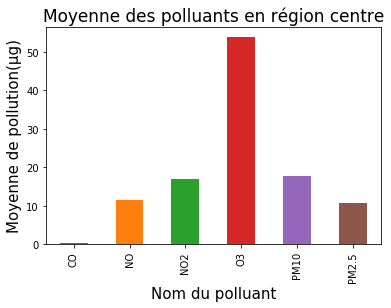

In [6]:
mean_polluant = QualitéAir1.groupby(by=['attributes.nom_polluant'])['attributes.valeur'].mean()
print(mean_polluant)
Histogramme_mean_polluant = mean_polluant.plot(kind='bar')
plt.xlabel("Nom du polluant" , fontsize=15) 
plt.ylabel("Moyenne de pollution(µg)" , fontsize=15)
plt.title("Moyenne des polluants en région centre" , fontsize=17)
plt.show()

#  5. Zones trafic VS Zones Fond

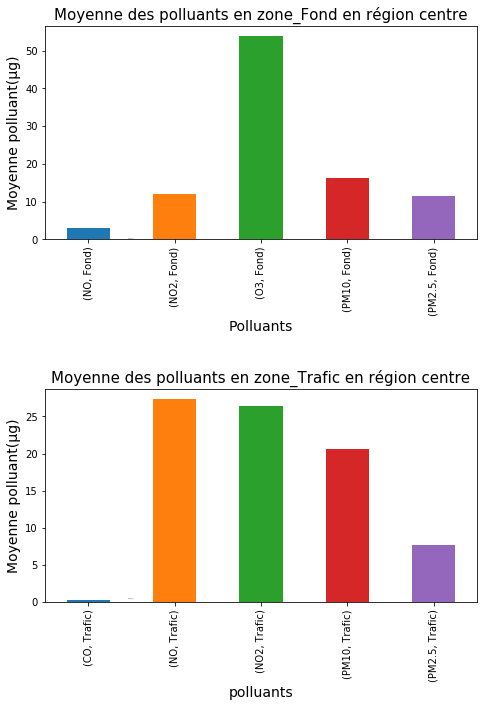

In [10]:
Zone_Trafic = QualitéAir1[(QualitéAir1["attributes.typologie"]=="Trafic")]
Moyenne_Valeurs_Zone_Trafic = Zone_Trafic.groupby(["attributes.nom_polluant" , "attributes.typologie"])["attributes.valeur"].mean()
Zone_Fond = QualitéAir1[(QualitéAir1["attributes.typologie"]=="Fond")]
Moyenne_Valeurs_Zone_Fond = Zone_Fond.groupby(["attributes.nom_polluant" , "attributes.typologie"])["attributes.valeur"].mean()


import matplotlib.pyplot as plt
figure = plt.figure(figsize = (15, 20))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 0.7, top = 0.7, wspace = 0, hspace = 0.7)
plt.subplot(1)
plt.subplot(Moyenne_Valeurs_Zone_Trafic.plot(kind='bar'))
plt.ylabel("Moyenne polluant(µg)" , fontsize=14)
plt.xlabel("polluants", fontsize=14)
plt.title("Moyenne des polluants en zone_Trafic en région centre" , fontsize=15)
plt.xticks(rotation=90, ha='center')
plt.text(0.5, 0.5, "subplot(121)", ha="center", va="center", size=1, alpha=10)
plt.subplot(2)
plt.subplot(Moyenne_Valeurs_Zone_Fond.plot(kind='bar'))
plt.ylabel("Moyenne polluant(µg)" , fontsize=14)
plt.xlabel("Polluants", fontsize=14)
plt.title("Moyenne des polluants en zone_Fond en région centre" , fontsize=15)
plt.xticks(rotation=90, ha='center')
plt.text(0.5, 0.5, "subplot(121)", ha="center", va="center", size=1, alpha=10)
plt.show()
  

# 6. Pollution par ville en région centre

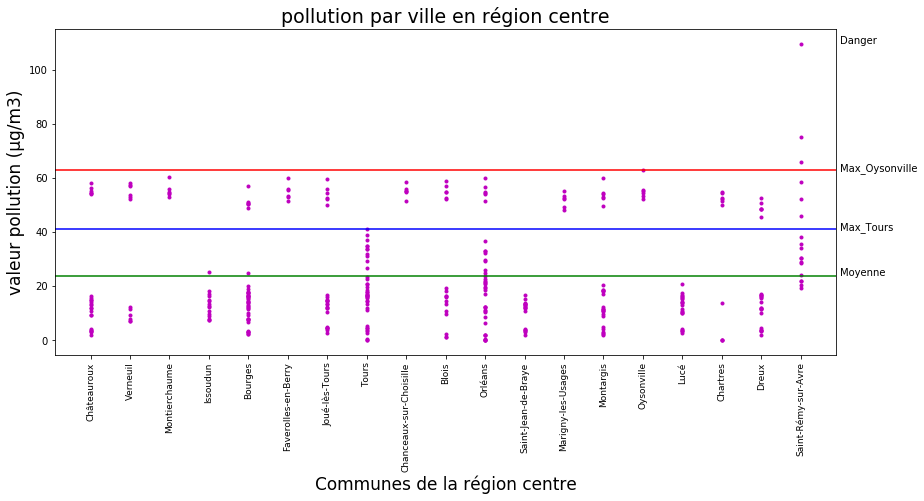

In [27]:
import matplotlib.pyplot as plt 

plt.figure(1, figsize = (14, 6))
plt.title("pollution par ville en région centre" , fontsize=19)
plt.plot(QualitéAir1["attributes.nom_com"], QualitéAir1["attributes.valeur"],"m.")
plt.xticks(rotation= "vertical")                                                
plt.xlabel("Communes de la région centre" , fontsize=17)   
plt.ylabel("valeur pollution (µg/m3)" , fontsize=17)                                                                                                                       
plt.axhline(y=23.678083, color='g', linestyle='-') 
plt.axhline(y=41, color='b', linestyle='-')
plt.axhline(y=62.7, color='r', linestyle='-')
plt.xticks(fontsize=9)
plt.text(19, 109.6, r'Danger') 
plt.text(19, 23.678083, r'Moyenne') 
plt.text(19, 41, r'Max_Tours') 
plt.text(19, 62.7, r'Max_Oysonville')  
plt.show()  


max_polluant_Tours = QualitéAir1.groupby(by=QualitéAir1["attributes.nom_com"]=="Tours")['attributes.valeur'].max()
max_polluant_Oysonville = QualitéAir1.groupby(by=QualitéAir1["attributes.nom_com"]=="Oysonville")['attributes.valeur'].max()

# 7. Calcul de la moyenne des polluants par commune avec groupby ()
###### Renomme la DataFrame : MoyenneVillePolluant
###### Affichage des données avec print()

In [13]:
mean_polluant_confondus = QualitéAir1.groupby(by=["attributes.nom_com"])['attributes.valeur'].mean()
print(mean_polluant_confondus)


attributes.nom_com
Blois                      26.050000
Bourges                    17.735714
Chanceaux-sur-Choisille    55.116667
Chartres                   32.960000
Châteauroux                21.104167
Dreux                      20.150000
Faverolles-en-Berry        54.816667
Issoudun                   13.053333
Joué-lès-Tours             21.400000
Lucé                       11.528571
Marigny-les-Usages         51.683333
Montargis                  20.707692
Montierchaume              55.416667
Orléans                    21.792500
Oysonville                 55.466667
Saint-Jean-de-Braye         9.883333
Saint-Rémy-sur-Avre        41.072222
Tours                      18.459150
Verneuil                   32.150000
Name: attributes.valeur, dtype: float64


# 8. Création graphique moyenne des polluants en région CENTRE

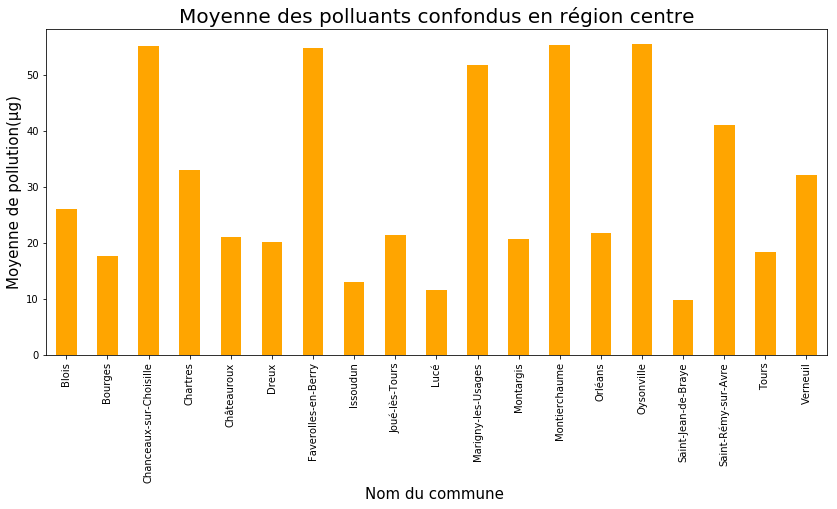

In [29]:
plt.figure(1, figsize = (14, 6))
Histogramme_mean_polluant_confondus = mean_polluant_confondus.plot(kind='bar' , color = "orange")
plt.xlabel("Nom du commune ", fontsize=15) 
plt.ylabel("Moyenne de pollution(µg)" , fontsize=15)
plt.title("Moyenne des polluants confondus en région centre" , fontsize=20)
plt.show()

# 8. Création de la carte avec les données
###### Importation de la librairie folium


In [40]:
import folium

# # 8.1 Création d'une boucle avec for i in range(len)
###### Affichage des données sous forme de cercle 
###### Choix de la taille et de la couleur avec radius =, color=, fill=True, fill_color=
###### Affichage de la carte avec print()

# Carte 03

In [31]:
centre = [47.3667, 1.7]
geo = json.load(open("contours-geographiques-des-departements-2019.geojson"))
RégionCentre = folium.Map(location = centre, zoom_start = 8)
RégionCentre.choropleth(geo_data = geo, fill_color='white')
folium.Marker(location = centre, popup = "Centre Val De Loire").add_to(RégionCentre)
RégionCentre_dep_marker = folium.Map(location = centre, zoom_start = 11)
for dep in geo["features"]:
    prop = dep["properties"]
    folium.Marker(prop['geo_point_2d'], popup = prop['nom_dep']).add_to(RégionCentre_dep_marker)

carte03 = folium.Map(location = [47.8, 1.9], tiles='Mapbox Control Room',zoom_depart=20)
O3c=QualitéAir1[(QualitéAir1["attributes.nom_polluant"] == "O3")]
O3gp=O3c.groupby(['attributes.nom_com']).mean()
nom_com=O3gp.index

for i in range(len(O3gp)):
   folium.Circle(
      location=[O3gp.iloc[i]['attributes.y_wgs84'], O3gp.iloc[i]['attributes.x_wgs84']],
      radius=O3gp.iloc[i]['attributes.valeur']*130,
      color='orange',
      fill=True,
      fill_color='orange'
   ).add_to(CarteRégionCentre)


FileNotFoundError: [Errno 2] No such file or directory: 'contours-geographiques-des-departements-2019.geojson'

# Carte PM10

In [18]:
cartePM10 = folium.Map(location = [47.8, 1.9], tiles='Mapbox Control Room',zoom_depart=20)
PM10c=QualitéAir[(QualitéAir["attributes.nom_polluant"] == "PM10")]
PM10gp=PM10c.groupby(['attributes.nom_com']).mean()
nom_com=PM10gp.index

for i in range(len(PM10gp)):
   folium.Circle(
      location=[PM10gp.iloc[i]['attributes.y_wgs84'], PM10gp.iloc[i]['attributes.x_wgs84']],
      radius=PM10gp.iloc[i]['attributes.valeur']*130,
      color='red',
      fill=True,
      fill_color='red'
   ).add_to(CarteRégionCentre)

# Carte NO2

In [20]:
carteNO2 = folium.Map(location = [47.8, 1.9], tiles='Mapbox Control Room',zoom_depart=20)
NO2c=QualitéAir[(QualitéAir["attributes.nom_polluant"] == "NO2")]
NO2gp=NO2c.groupby(['attributes.nom_com']).mean()
nom_com=NO2gp.index

for i in range(len(NO2gp)):
   folium.Circle(
      location=[NO2gp.iloc[i]['attributes.y_wgs84'], NO2gp.iloc[i]['attributes.x_wgs84']],
      radius=NO2gp.iloc[i]['attributes.valeur']*130,
      color='yellow',
      fill=True,
      fill_color='yellow'
   ).add_to(CarteRégionCentre)

# Carte O3

In [ ]:
carteO3 = folium.Map(location = [47.8, 1.9], tiles='Mapbox Control Room',zoom_depart=20)
O3c=QualitéAir[(QualitéAir["attributes.nom_polluant"] == "O3")]
O3gp=COc.groupby(['attributes.nom_com']).mean()
nom_com=O3gp.index

for i in range(len(COgp)):
   folium.Circle(
      location=[COgp.iloc[i]['attributes.y_wgs84'], COgp.iloc[i]['attributes.x_wgs84']],
      radius=COgp.iloc[i]['attributes.valeur']*700,
      color='orange',
      fill=True,
      fill_color='crimson'
   ).add_to(CarteRégionCentre)

# Carte CO

In [30]:
carteCO = folium.Map(location = [47.8, 1.9], tiles='Mapbox Control Room',zoom_depart=20)
COc=QualitéAir[(QualitéAir["attributes.nom_polluant"] == "CO")]
COgp=COc.groupby(['attributes.nom_com']).mean()
nom_com=COgp.index

for i in range(len(COgp)):
   folium.Circle(
      location=[COgp.iloc[i]['attributes.y_wgs84'], COgp.iloc[i]['attributes.x_wgs84']],
      radius=COgp.iloc[i]['attributes.valeur']*700,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(CarteRégionCentre)

# Carte NO

In [24]:
carteNO = folium.Map(location = [47.8, 1.9], tiles='Mapbox Control Room',zoom_depart=20)
NOc=QualitéAir[(QualitéAir["attributes.nom_polluant"] == "NO")]
NOgp=NOc.groupby(['attributes.nom_com']).mean()
nom_com=NOgp.index

for i in range(len(NOgp)):
   folium.Circle(
      location=[NOgp.iloc[i]['attributes.y_wgs84'], NOgp.iloc[i]['attributes.x_wgs84']],
      radius=NOgp.iloc[i]['attributes.valeur']*130,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(CarteRégionCentre)

# Carte PM2.5

In [44]:
cartePM25 = folium.Map(location = [47.8, 1.9], tiles='Mapbox Control Room',zoom_depart=20)
PM25c=QualitéAir[(QualitéAir["attributes.nom_polluant"] == "PM25")]
PM25gp=PM25c.groupby(['attributes.nom_com']).mean()
nom_com=PM25gp.index

for i in range(len(PM25gp)):
   folium.Circle(
      location=[PM25gp.iloc[i]['attributes.y_wgs84'], PM25gp.iloc[i]['attributes.x_wgs84']],
      radius=PM25gp.iloc[i]['attributes.valeur']/1,
      color='magenta',
      fill=True,
      fill_color='magenta'
   ).add_to(CarteRégionCentre)

# 8.2 Afficher la carte comme une page internet html
###### Importation os
###### Importation webbrowser
###### Indiquer le chemin de la carte dans l'ordinateur
###### Exécuter la touche F5 pour afficher la carte depuis Python

In [45]:
import os 
import webbrowser
chemin = os.getcwd() + 'CarteRégionCentre.html' 
RégionCentre.save('CarteRégionCentre.html') 
webbrowser.open('file://CarteRégionCentre.html')

True

# Pour conclure :

#                   Lucé, Issoudun, Sait-Jean-de-Braye

Le Programme Régional de Surveillance de la Qualité de l'Air PRSQA 2017-2021 : https://www.ligair.fr/media/docutheque/PRSQA2017-2021-LigAir_VF_Mai2017.pdf

 Indice de qualité de l'air : https://www.ligair.fr/la-reglementation-1/lindice-de-la-qualite-de-lair

https://www.ligair.fr/media/docutheque/Fiches_th__matiques_LigAir.pdf

 https://www.data.gouv.fr/fr/datasets/contours-geographiques-2019-des-departements-de-la-region-centre-val-de-loire/

https://www.ligair.fr/media/docutheque/Fiches_th__matiques_LigAir.pdf
